In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../pose_embedding_training_non_norm_range_ten_vneck/')
sys.path.append('../../pose_embedding_training_non_norm_range_ten_vneck/commons/')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib
matplotlib.use("Agg")
import scipy.io as sio

# from other_utils import np_utils, sk_utils
import numpy as np
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import matplotlib.gridspec as gridspec
 

import model_componets as comps
from data_loader import DataLoader
from commons import transform_util as tr_util
from model_componets import *
import vis_image as vis

import random


AttributeError: 'module' object has no attribute 'get_cwd'

In [4]:
os.getcwd()

'/Users/anirudh.jamkhandi/Desktop/IISc/rule_based_pose_estimation/pose_embedding_training_non_norm_range_ten_vneck'

In [3]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]


os.environ['CUDA_VISIBLE_DEVICES'] = "1"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

def get_network_params(scope):
    return tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope=scope)


def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    x, y, z = subplot
    ax = fig.add_subplot(subplot, projection='3d')

    lim = np.max(np.abs(joints_3d))
    ax.view_init(azim=az, elev=ele)

    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    return ax

def plot_skeleton(ax, ske,color_ours,az, ground_size=0.5):
        lcolor = color_ours[0]
        rcolor = color_ours[1]
        ax.grid(False)
#         # Hide axes ticks
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_zticks([])
#         plt.axis('off')
#         ax.set_aspect('equal')
        ax.elev = 10
        ax.azim = az
#         ax.azim = 0 
#         ax.dist = 9
#         ax.set_xlim(-10, 10)
#         ax.set_ylim(-10, 10)
#         ax.set_zlim(-10, 10)
        
        
# 
        lim = np.max(np.abs(ske))
#         ax.view_init(azim=az, elev=ele)

        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_zlim(-lim, lim)
        
        ax.set_xlabel('x',labelpad=-8)
        ax.set_ylabel('y',labelpad=-8)
        ax.set_zlabel('z',labelpad = -10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_zticklabels([])
        ax.axis('off')       




        # ax.set_aspect('equal')

#         ax.view_init(azim=90, elev=10)

        C = [{0: lcolor,  1: rcolor}[flag] for flag in lr_flags]
        P = limb_parents

        # Make connection matrix
#         joint_lines = []
        for i in range(ske.shape[0]):
            x = [ske[i, 0], ske[P[i], 0]]
            y = [ske[i, 1], ske[P[i], 1]]
            z = [ske[i, 2], ske[P[i], 2]]
#             x = [ske[i, 0]*1.2, ske[P[i]*1.2, 0]]
#             y = [ske[i, 1]*1.2, ske[P[i]*1.2, 1]]
#             z = [ske[i, 2]*1.2, ske[P[i]*1.2, 2]]
            
            # print x,y,z
            ax.plot(x, y, z, lw=4, c=C[i])



# color_ours = ['blue',  'green']
# color_ours = ['#5879ff',  '#cc2520']

lr_flags = [
    1, 1,
    1, 1, 1,
    0, 0, 0,
    1,
    1, 1, 1, 1,
    0, 0, 0, 0,
]




def get_all_plots_images(skeleton_strips):
    m = 15
    fig=plt.figure(figsize=(1.77 * 4 * 45 , 4))
    gs = gridspec.GridSpec(1, m)
    gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 

    for j in range(m):
        idx = j
        ax = plt.subplot(gs[idx])
        k=mpimg.imread(skeleton_strips[j])
        ax.imshow(k)
        ax.axis('off')    

    return fig  


def get_all_plots(skeleton_strips_male,az):
    
#     l = len(os.listdir('./pose_grid_4/grid_plots/')) + 1
#     os.makedirs('./pose_grid_4/grid_plots/plot_{}/'.format(str(l)))
#     sio.savemat('./pose_grid_4/grid_plots/plot_{}/artifacts.mat'.format(str(l)),{'gt':x_inputs,'embedding':grid_flat,'grid':pred_ops})
    
#     fig=plt.figure(figsize=(4  * 15 , 4 * 15))#width , height
    fig=plt.figure(figsize=(4  , 5))#width , height
    gs = gridspec.GridSpec(1, 1) #rows and columns
#     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 
    gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
    cnt = 0
    for i in range (10):
    #     lcolor, rcolor = colors
        for j in range(11):
            idx = j
#             ax = plt.subplot(gs[idx], projection='3d')
#     #         color_ours = ['blue',  'green']
#             color_ours = ['k','m']

#             plot_skeleton(ax, skeleton_strips_male[j],color_ours,az)
    #         color_ours = ['#5879ff',  '#cc2520']
    #         color_ours = ['k','m']
    #         plot_skeleton(ax, skeleton_strips_female[j],color_ours)
            ax = plt.subplot(gs[0], projection='3d')
            color_ours = ['k','m']
            plot_skeleton(ax, skeleton_strips_male[cnt],color_ours,az)
            cnt = cnt + 1

#             plt.savefig("{}{}.png".format(path,i),bbox_inches = 'tight',dpi=350, transparent = True);
            plt.savefig("./pose_grid_4/grid_plots/plot_4/single-{}-{}.png".format(i,j),bbox_inches = 'tight',dpi=350, transparent = True);

    return fig



# def get_tmp_plots(skeleton_strips_male,az):
    
#     l = len(os.listdir('./pose_grid_4/corner_plots/')) + 1
#     os.makedirs('./pose_grid_4/corner_plots/plot_{}/'.format(str(l)))
#     sio.savemat('./pose_grid_4/corner_plots/plot_{}/corner_artifacts.mat'.format(str(l)),{'corner_poses':final_poses})

# #     fig=plt.figure(figsize=(4  * 15 , 4 * 15))#width , height
#     fig=plt.figure(figsize=(4  * 10 , 5))#width , height
#     gs = gridspec.GridSpec(1, 10) #rows and columns
# #     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 
#     gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
#     cnt = 0
#     for i in range (2):
#     #     lcolor, rcolor = colors
#         for j in range(2):
#             idx = j
# #             ax = plt.subplot(gs[idx], projection='3d')
# #     #         color_ours = ['blue',  'green']
# #             color_ours = ['k','m']

# #             plot_skeleton(ax, skeleton_strips_male[j],color_ours,az)
#     #         color_ours = ['#5879ff',  '#cc2520']
#     #         color_ours = ['k','m']
#     #         plot_skeleton(ax, skeleton_strips_female[j],color_ours)
#             ax = plt.subplot(gs[j], projection='3d')
#             color_ours = ['k','m']
#             plot_skeleton(ax, skeleton_strips_male[cnt],color_ours,az)
#             cnt = cnt + 1
#             plt.savefig("./pose_grid_4/corner_plots/plot_{}/grid{}.png".format(str(l),i),bbox_inches = 'tight',dpi=350, transparent = True);
# #             plt.savefig("{}{}.png".format(path,i),bbox_inches = 'tight',dpi=350, transparent = True);
        
#     return fig



In [3]:
data = '/data/vcl/anirudh_rule_based/codes_2020/pose_embedding_training_non_norm_range_ten_vneck/pose_grid_4/grid_plots/plot_flipped/artifacts.mat'

In [4]:
mat_file = sio.loadmat(data)

grid = mat_file['grid']

In [5]:
print grid.shape

(100, 17, 3)


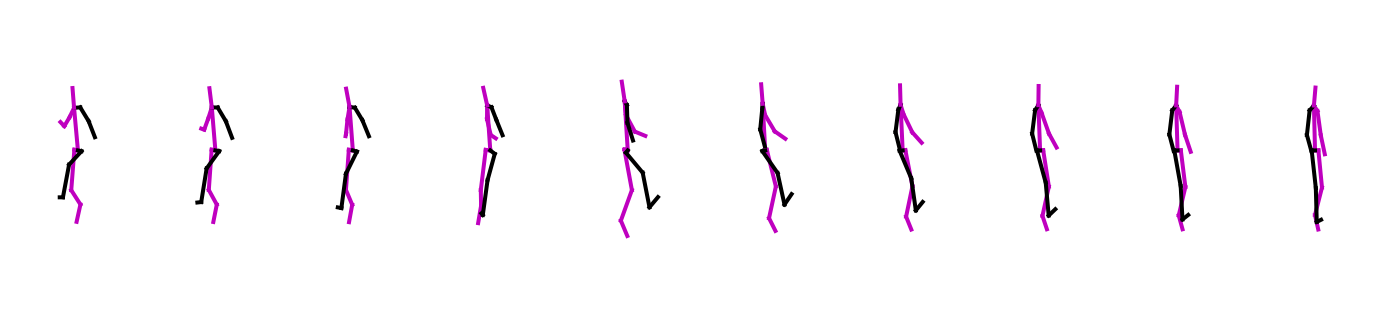

In [128]:
%matplotlib inline 
fig=plt.figure(figsize=(4  * 10 , 5))#width , height
gs = gridspec.GridSpec(1, 10) #rows and columns
#     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 
gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
cnt = 0 
tmp = grid[20:30]
for j in range(0,10):
    ax = plt.subplot(gs[cnt], projection='3d')
    color_ours = ['k','m']
    plot_skeleton(ax, tmp[j],color_ours,az = 0)
    cnt =cnt + 1 

In [6]:
t= np.reshape(grid,(-1,10,17,3))

In [7]:
l = np.linspace(t[:,[3]],t[:,[4]],3)
print l[1].shape

(10, 1, 17, 3)


In [8]:
k=[]
index = 4
for j in range(10) :
    arr = []
    for i in range(10):
        if i == index : 
            arr.append(np.squeeze(l[1][j]))
            arr.append(t[j][i])
        else :
            arr.append(t[j][i])
    k.append(arr)
    
k = np.array(k)

In [9]:
k[3,3] = k[4,3]

ValueError: input operand has more dimensions than allowed by the axis remapping

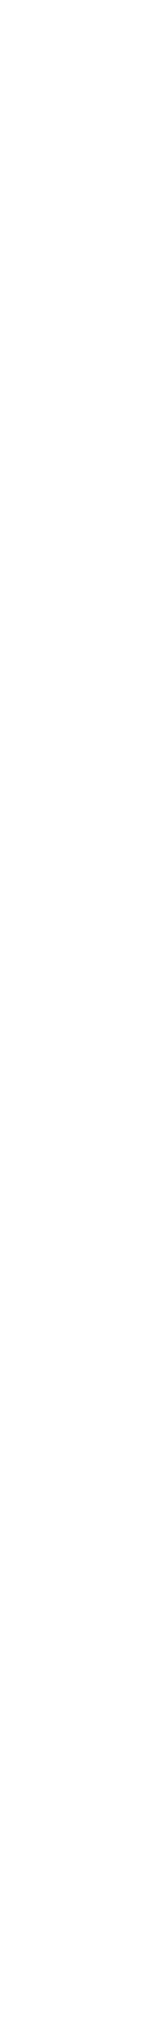

In [11]:
%matplotlib inline 
fig=plt.figure(figsize=(4  * 11 , 5 * 7))#width , height
gs = gridspec.GridSpec(1, 11) #rows and columns
#     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 
gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
cnt = 0 
for i in range(10):
    for j in range(0,11):
        ax = plt.subplot(gs[i], projection='3d')
        color_ours = ['k','m']
        plot_skeleton(ax, k[cnt],color_ours,az = 0)
        cnt =cnt + 1 

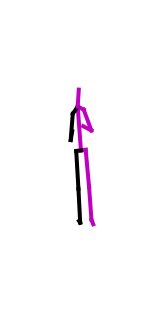

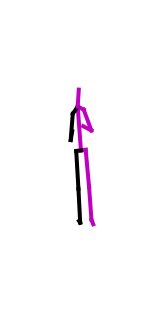

In [20]:
get_all_plots(k.reshape((-1,17,3)),az = 0)

In [197]:
k.reshape((-1,17,3)).shape

(110, 17, 3)

In [13]:
k.shape

(10, 11, 17, 3)

In [21]:
motion_data = '/data/vcl/anirudh_rule_based/codes_2020/motion_rules_training_non_norm_range_ten_vneck/pca_poses.mat'

In [22]:
rules_data = sio.loadmat(motion_data)

In [23]:
rules_data.keys()

['normal_backward',
 'flipped_forward',
 'slow_backward',
 '__header__',
 '__globals__',
 'fast_forward',
 '__version__',
 'original_sequence']

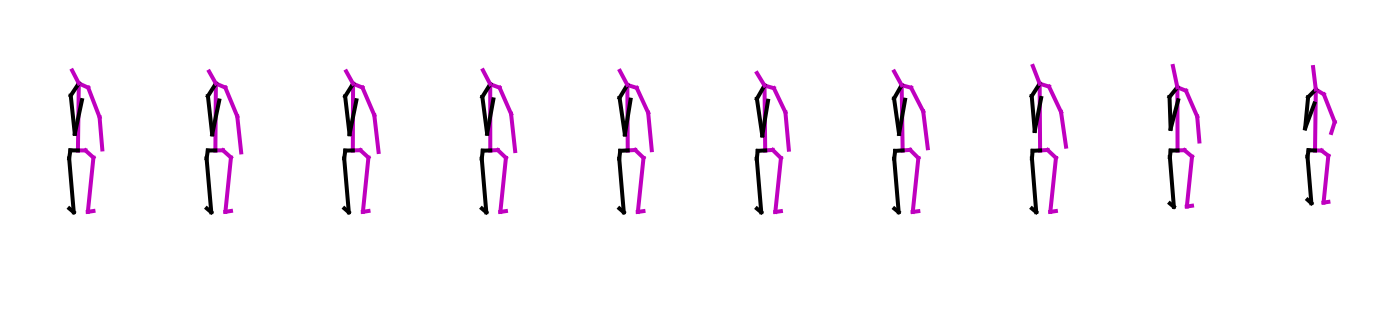

In [28]:
%matplotlib inline 
fig=plt.figure(figsize=(4  * 10 , 5))#width , height
gs = gridspec.GridSpec(1, 10) #rows and columns
#     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 
gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
cnt = 0 
tmp = rules_data['normal_backward']
for j in range(0,10):
    ax = plt.subplot(gs[cnt], projection='3d')
    color_ours = ['k','m']
    plot_skeleton(ax, tmp[j],color_ours,az = 90)
    cnt =cnt + 1 

In [29]:
rules_data['original_sequence'].shape

(1500, 17, 3)